### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

Example input: `psi(2, 3)`

Example output: `[1, 2, 4, 8]`

- HINT: use FOR loop with `for i in range(m+1):` inside the psi function

In [95]:
def psi(x,m):
    psi = []
    for i in range(m+1):
        psi.append(x**i)
    return psi

psi(2,3)

[1, 2, 4, 8]

In [96]:
import numpy as np

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

Example input: `h(2,2,3)`

Example output: `array([ 2,  4,  8, 16])`

- HINT: use the `np.dot` between the $\alpha$ and the output of psi(x, m)

In [136]:
def h(x,a,m):
    a=np.array(a).transpose()
    return np.dot(a,psi(x,m))
    
h(2,2,3)

array([ 2,  4,  8, 16])

#### Task 3
Create a random 3rd order polynomial and call it `p3`

- HINT: check function `np.poly1d`

In [98]:
p3 = np.poly1d([4,3,2,1])
print(np.poly1d(p3))




   3     2
4 x + 3 x + 2 x + 1


In [99]:
f.c

array([4, 3, 2, 1])

In [100]:
f.order

3

In [101]:
# first order polynomial
f = np.poly1d([4,1])
print(np.poly1d(f))

 
4 x + 1


#### Task 4
Choose an interval `[a,b]`, on which the polynomial is S-shaped. 

At first we can choose random interval, for example `[-3,5)`, and come back to this task after **Task 7**.

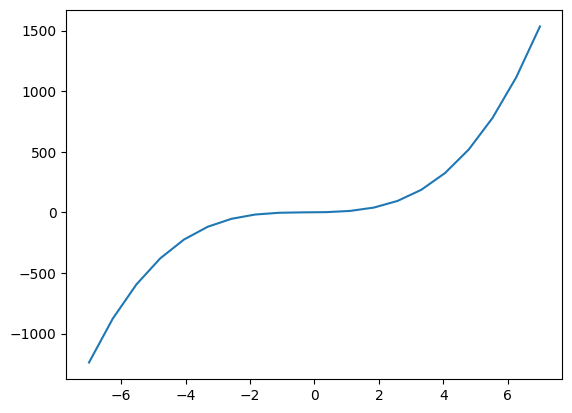

In [102]:
import matplotlib.pyplot as plt
x = np.linspace(a,b,20)
y = p3(x)
plt.plot(x,y)
a = -7
b = 7

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

- HINT: use `np.random.random_sample` function

Output `xs` should be numpy array with length=30 and values between `a` and `b`

In [103]:
xs = np.random.random_sample(size=(30)) * (b-a) + a
print(xs.shape)
xs

(30,)


array([-4.15652216,  4.4094367 , -6.69204234,  3.68663067,  0.26848042,
        0.11565402,  0.60552631, -4.66192984,  6.85047046,  4.175602  ,
       -3.43179294,  2.6419994 , -4.25299427,  6.78584446,  3.53689381,
        5.24149822,  6.42893695, -2.44175475,  0.08556244, -6.31576381,
       -0.99027578, -2.67036151,  0.21450923,  0.95352626, -4.00983037,
       -6.55493869,  2.77259906,  0.3953479 , -5.34458119,  5.59831024])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

- HINT: `ys = p3(xs)`

In [104]:
ys = p3(xs)
ys

array([-2.42726570e+02,  4.11081309e+02, -1.07680425e+03,  2.49570612e+02,
        1.83061620e+00,  1.27762349e+00,  4.19913318e+00, -3.48404975e+02,
        1.44142920e+03,  3.52875536e+02, -1.32199663e+02,  1.00990804e+02,
       -2.60954074e+02,  1.40260446e+03,  2.22583400e+02,  6.69907994e+02,
        1.20071506e+03, -4.42296017e+01,  1.19559327e+00, -8.99679700e+02,
       -1.92305360e+00, -5.91158132e+01,  1.60654297e+00,  9.10252085e+00,
       -2.16675515e+02, -1.00979822e+03,  1.14862379e+02,  2.50676714e+00,
       -5.34657705e+02,  8.08048154e+02])

In [110]:
ys.shape

(30,)

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

Is the curve S-shaped? if not, repeat steps 3-7.

- HINT: check out function `plt.scatter`
- HINT: polynomial `p3 = np.poly1d([1,-3, 2,-1])` is S-shaped on the interval `[-3,5]`



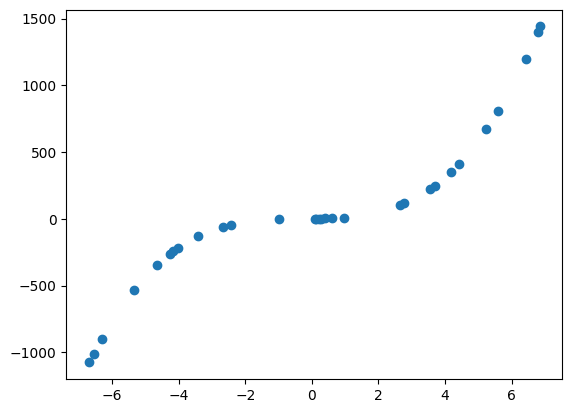

In [105]:
plt.scatter(xs,ys)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi(x,m) from the **Task I**, create the matrix X defined as 

<img src="matrixX.png">

- HINT: Use a for loop and call psi(x,2) on every item in `xs`. Output should be stored as columns in matrix X.
- HINT: For `m = 2` and `len(xs) = 30`, the `X.shape = (3,30)`

In [106]:
X = np.zeros((3,30))
X.shape

(3, 30)

In [107]:
m=2
X=[]
for x in range(len(xs)):
    X.append(psi(x,m))
    # print(x)
X = np.array(X)
print(type(X))
print(X.shape)
X


<class 'numpy.ndarray'>
(30, 3)


array([[  1,   0,   0],
       [  1,   1,   1],
       [  1,   2,   4],
       [  1,   3,   9],
       [  1,   4,  16],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,   7,  49],
       [  1,   8,  64],
       [  1,   9,  81],
       [  1,  10, 100],
       [  1,  11, 121],
       [  1,  12, 144],
       [  1,  13, 169],
       [  1,  14, 196],
       [  1,  15, 225],
       [  1,  16, 256],
       [  1,  17, 289],
       [  1,  18, 324],
       [  1,  19, 361],
       [  1,  20, 400],
       [  1,  21, 441],
       [  1,  22, 484],
       [  1,  23, 529],
       [  1,  24, 576],
       [  1,  25, 625],
       [  1,  26, 676],
       [  1,  27, 729],
       [  1,  28, 784],
       [  1,  29, 841]])

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6 and X is matrix from the Task 8.

- HINT: Numpy functions `np.dot`, `np.linalg.inv` and `transpose()` should be used

In [118]:

pseudomatrix = np.linalg.pinv(np.dot(X,X.transpose()))
np.dot(np.dot(pseudomatrix,X).transpose(),ys) 
# Jeremy said that the orientation of rows and columns in X are flipped, which is likely why an error
# message was given if trying to calculate using the equation given by the exercise.


array([-142.58930549,   56.04367203,   -2.0960958 ])

In [181]:
# Calculate the dot product of X and X^T
prod = np.dot(X, X.T)

# Calculate the pseudoinverse matrix
pseudo = np.linalg.inv(prod)

# Calculate alpha
alpha = np.dot(np.dot(pseudo, X), ys)


LinAlgError: Singular matrix

*CORRECT equation should be this:* $\alpha = (X^TX)^+X^Ty$
according to here p. 8 (alpha represented by b): https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf



In [126]:
pseudomatrix = np.linalg.pinv(np.dot(X.transpose(),X))
alpha = np.dot(np.dot(pseudomatrix,X.transpose()),ys) 
# This calculation is for for the X and X transpose swapped.

In [121]:
print(pseudomatrix.shape)
print(X.shape)
print(np.dot(pseudomatrix,X).shape)
ys.transpose()

(30, 30)
(30, 3)
(30, 3)


array([-2.42726570e+02,  4.11081309e+02, -1.07680425e+03,  2.49570612e+02,
        1.83061620e+00,  1.27762349e+00,  4.19913318e+00, -3.48404975e+02,
        1.44142920e+03,  3.52875536e+02, -1.32199663e+02,  1.00990804e+02,
       -2.60954074e+02,  1.40260446e+03,  2.22583400e+02,  6.69907994e+02,
        1.20071506e+03, -4.42296017e+01,  1.19559327e+00, -8.99679700e+02,
       -1.92305360e+00, -5.91158132e+01,  1.60654297e+00,  9.10252085e+00,
       -2.16675515e+02, -1.00979822e+03,  1.14862379e+02,  2.50676714e+00,
       -5.34657705e+02,  8.08048154e+02])

In [122]:
ys

array([-2.42726570e+02,  4.11081309e+02, -1.07680425e+03,  2.49570612e+02,
        1.83061620e+00,  1.27762349e+00,  4.19913318e+00, -3.48404975e+02,
        1.44142920e+03,  3.52875536e+02, -1.32199663e+02,  1.00990804e+02,
       -2.60954074e+02,  1.40260446e+03,  2.22583400e+02,  6.69907994e+02,
        1.20071506e+03, -4.42296017e+01,  1.19559327e+00, -8.99679700e+02,
       -1.92305360e+00, -5.91158132e+01,  1.60654297e+00,  9.10252085e+00,
       -2.16675515e+02, -1.00979822e+03,  1.14862379e+02,  2.50676714e+00,
       -5.34657705e+02,  8.08048154e+02])

#### Task 10
Plot the original data and the computed polynomial which represents our prediction into one chart. Does it fit? We need to compute prediction using alpha from the **Task 9** for the each item in xs.

HINT: for first item in xs, prediction is `y_est = h(list(xs)[1],alpha, m)` where alpha is output of the **Task 9** and **m=2**. This needs to be repeated for every element of xs

In [168]:
alpha[0]

-142.58930547605326

In [170]:
m=2
y_est = h(list(xs)[1],alpha,m)
print(list(xs)[1],y_est)

4.409436701576782 63.777051384582876


In [175]:
y_pred = h(xs,alpha,m)

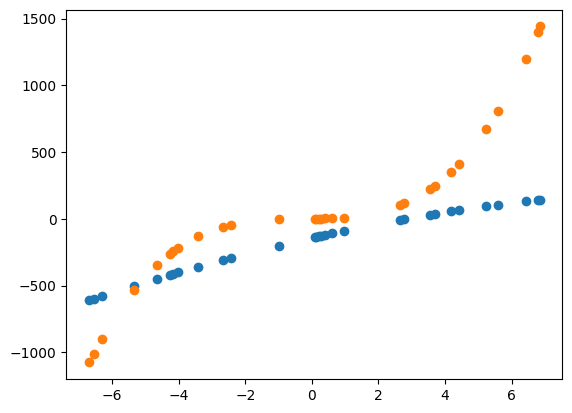

In [177]:
plt.scatter(xs,y_pred)
plt.scatter(xs,ys)

In [189]:
type(y_pred)

numpy.ndarray

#### Task 11
Repeat the process, **tasks 8-10**, for m=3,…,10. What do you observe? Which polynomial has the best fit?

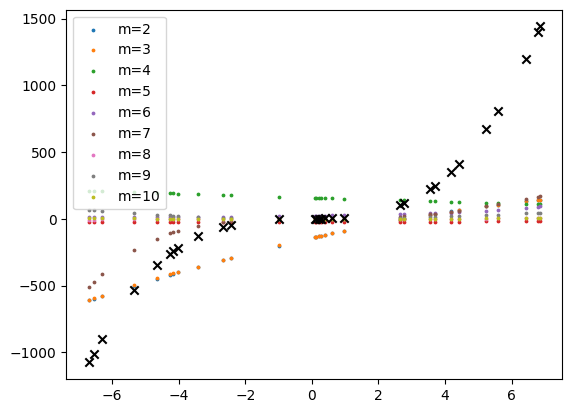

In [220]:

for m in range(2,11):
    X=[]
    for x in range(len(xs)):
        X.append(psi(x,m))
    X = np.array(X)
    pseudomatrix = np.linalg.pinv(np.dot(X.transpose(),X))
    alpha = np.dot(np.dot(pseudomatrix,X.transpose()),ys) 
    y_pred = h(xs,alpha,m)
    plt.scatter(xs,y_pred,label='m='+str(m),s=3)
plt.scatter(xs,ys,marker='x',c='black')
leg = plt.legend()

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. 

y is our `ys` from the Task 6 and $\alpha^Tx$ are our predictions `y_est`. 

What do you observe? Could you tell the optimal m from the plot?

- HINT: loss can be computed as:

```
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()
```

In [188]:
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()


6475493.990691491


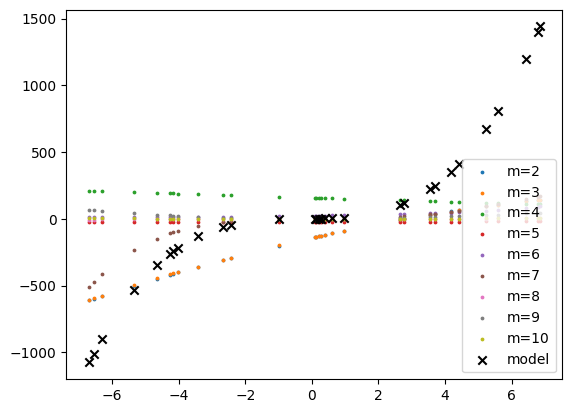

In [227]:
loss = []
for m in range(2,11):
    X=[]
    for x in range(len(xs)):
        X.append(psi(x,m))
    X = np.array(X)
    pseudomatrix = np.linalg.pinv(np.dot(X.transpose(),X))
    alpha = np.dot(np.dot(pseudomatrix,X.transpose()),ys) 
    y_pred = h(xs,alpha,m)
    plt.scatter(xs,y_pred,label='m='+str(m),s=3)
    # Calculate loss function
    loss.append(compute_loss(y_pred,ys))
plt.scatter(xs,ys,marker='x',c='black',label='model')
leg = plt.legend(loc='lower right')


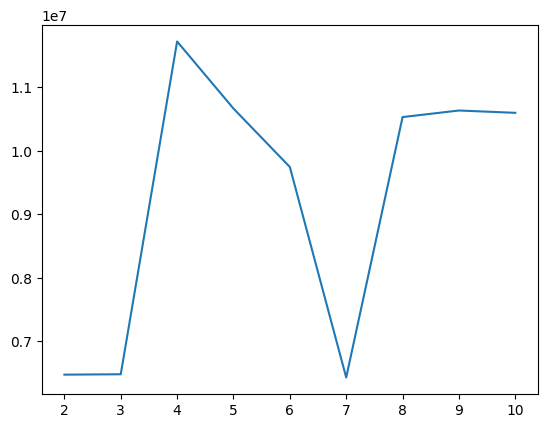

In [224]:
plt.plot(range(2,11),loss)